# Relevant Mathematical Background

- The singular value decomposition is arguably the most important exact matrix decomposition, and it is used extensively in data analysis, signal processing, image processing, and many other fields. 

- The decomposition has the following form:
$$A = U \Sigma V^T$$
Here $U,V$ orthonormal, $\Sigma$ diagonal with positive entries. These entries can be sorted and are called the singular values. The columns of $U$ and $V$ are known as the singular vectors.

- Many important properties of the matrix $A$ can be extracted from its SVD.

  * A $m\times n$ matrix $A$ represents a linear transformation $f$ between two spaces $f: \mathbb{R}^n \rightarrow \mathbb{R}^m$. The existence of SVD is a manifestation of the following fact: 
Every linear transformation can be viewed as a rotation followed by an independent scaling along the coordinates, followed by an other rotation.
$$
Ax = U (\Sigma (V^\top x))
$$

  * The left singular vectors in matrix $U$ represent the relationships between the rows of $A$.
  *The right singular vectors in matrix $V$ represent the relationships between the columns of $A$.
  *The singular values in matrix $\Sigma$ represent the strength of these relationship



# SVD Visualization

## Setup and Helper Functions

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import clear_output, display, HTML
from matplotlib import rc

In [11]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [12]:
def pnorm_ball_points(A=np.eye(2), mu=np.array([0,0]),p=2, N=128):
    '''
    Creates the points on a p normball y = A x + \mu 
    where x are points on the unit circle.
    '''
    if p is np.infty:
    	X = np.array([[1,1],[1,-1],[-1,-1],[-1,1],[1,1]]).T
    else:
	    th = np.arange(0, 2*np.pi+np.pi/N, np.pi/N)
	    X = np.array([np.cos(th),np.sin(th)])
	    X = X*(1/(np.abs(X[0,:])**p + np.abs(X[1,:])**p ))**(1/p)


    Y = np.dot(A, X)
    data_x = mu[0]+Y[0,:]
    data_y = mu[1]+Y[1,:]
    return data_x, data_y

In [13]:
def bmatrix(a):
    """Returns a LaTeX bmatrix
    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'$\left(\begin{array}{cc}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{array}\right)$']
    return ''.join(rv)

In [ ]:
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=False)

## Visualizing SVD Transformations

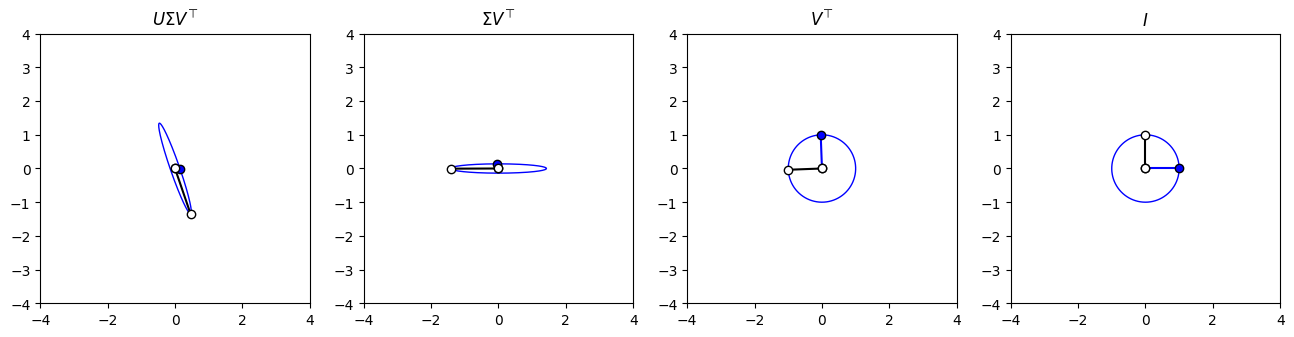

In [16]:
np.set_printoptions(precision=3, suppress=True)

fig = plt.figure(figsize=(16,4))

ax1 = plt.subplot(1,4,4)
ax2 = plt.subplot(1,4,3)
ax3 = plt.subplot(1,4,2)
ax4 = plt.subplot(1,4,1)

dx,dy = pnorm_ball_points()
X = np.c_[dx,dy].T
B = np.c_[np.zeros((2,1)), np.eye(2)]

ln_domain_ball = plt.Line2D(dx,dy,markeredgecolor='k', linewidth=1, color='b')
ln_e1 = plt.Line2D(B[0,[0,1]],B[1,[0,1]],markeredgecolor='k', marker='o', color='b')
ln_e2 = plt.Line2D(B[0,[0,2]],B[1,[0,2]],markeredgecolor='k', markerfacecolor='w', marker='o', color='k')

ax1.add_line(ln_domain_ball)
ax1.add_line(ln_e1)
ax1.add_line(ln_e2)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.set_title('$I$')

A = np.random.randn(2,2)
U,S,V=np.linalg.svd(A)

X = V.dot(X)
B = V.dot(B)
ln_VTx = plt.Line2D(X[0,:],X[1,:],markeredgecolor='k', linewidth=1, color='b')
ln_VTe1 = plt.Line2D(B[0,[0,1]],B[1,[0,1]],markeredgecolor='k', marker='o', color='b')
ln_VTe2 = plt.Line2D(B[0,[0,2]],B[1,[0,2]],markeredgecolor='k', markerfacecolor='w', marker='o', color='k')

ax2.add_line(ln_VTx)
ax2.add_line(ln_VTe1)
ax2.add_line(ln_VTe2)

ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.set_title('$V^\\top$')

S = np.diag(S)
X = S.dot(X)
B = S.dot(B)
ln_SVTx = plt.Line2D(X[0,:],X[1,:],markeredgecolor='k', linewidth=1, color='b')
ln_SVTe1 = plt.Line2D(B[0,[0,1]],B[1,[0,1]],markeredgecolor='k', marker='o', color='b')
ln_SVTe2 = plt.Line2D(B[0,[0,2]],B[1,[0,2]],markeredgecolor='k', markerfacecolor='w', marker='o', color='k')

ax3.add_line(ln_SVTx)
ax3.add_line(ln_SVTe1)
ax3.add_line(ln_SVTe2)

ax3.set_xlim([-4,4])
ax3.set_ylim([-4,4])
ax3.set_aspect('equal')
ax3.set_title(r'$\Sigma V^\top$')

X = U.dot(X)
B = U.dot(B)
ln_USVTx = plt.Line2D(X[0,:],X[1,:],markeredgecolor='k', linewidth=1, color='b')
ln_USVTe1 = plt.Line2D(B[0,[0,1]],B[1,[0,1]],markeredgecolor='k', marker='o', color='b')
ln_USVTe2 = plt.Line2D(B[0,[0,2]],B[1,[0,2]],markeredgecolor='k', markerfacecolor='w', marker='o', color='k')

ax4.add_line(ln_USVTx)
ax4.add_line(ln_USVTe1)
ax4.add_line(ln_USVTe2)

ax4.set_xlim([-4,4])
ax4.set_ylim([-4,4])
ax4.set_aspect('equal')
ax4.set_title(r'$U \Sigma V^\top$')

plt.show()

* SVD gives an approximation to the matrix $A$ in terms of rank one matrices

$$
A = U\Sigma V^\top
$$

$$
A = \sigma_1 u_1 v_1^\top + \sigma_2 u_2 v_2^\top + \dots + \sigma_n u_n v_n^\top
$$

* For any $r$ smaller than the rank $R=\min(M,N)$ of the matrix $A$, we can obtain the best 
approximation, i.e.,
$$
A_r = \sum_{i=1}^r \sigma_r u_r v_r^\top 
$$

The error $E = A - A_r$ is smallest (as measured by $\|E\|_F^2$) for any rank $r$ approximation of $A$.

* Columns of matrix $U$ are known as 'Principal Components'



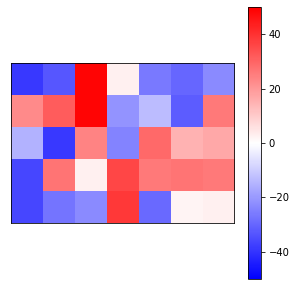

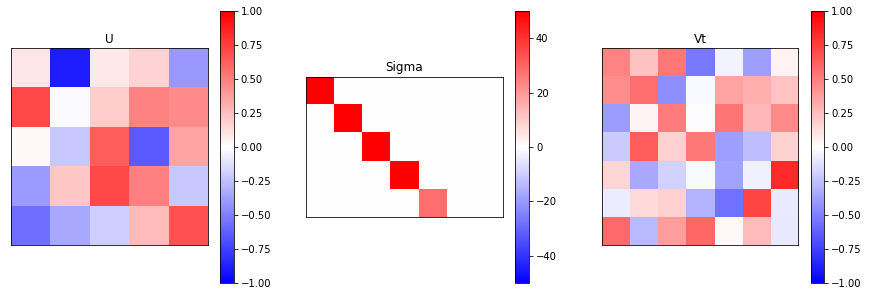

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import scipy.linalg as la

M = 5
N = 7

Range = 50
A = np.ceil(2*Range*np.random.rand(M, N)-Range)


def show_matrix(X, Range=Range, cmap='bwr', cbar=True):
    plt.imshow(X, interpolation='nearest', cmap=cmap, vmin=-Range, vmax=Range)
    if cbar:
        plt.colorbar()
    plt.xticks([])
    plt.yticks([])


plt.figure(figsize=(5,5))
show_matrix(A)
plt.show()

U,S,Vt = la.svd(A)
Sig = la.diagsvd(S, M, N)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
show_matrix(U, cmap='bwr', Range=1)
plt.title('U')
plt.subplot(1,3,2)
show_matrix(Sig, cmap='bwr')
plt.title('Sigma')
plt.subplot(1,3,3)
show_matrix(Vt, cmap='bwr', Range=1)
plt.title('Vt')
plt.show()

<ipython-input-20-fd4a974443f4>:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(rr, S)


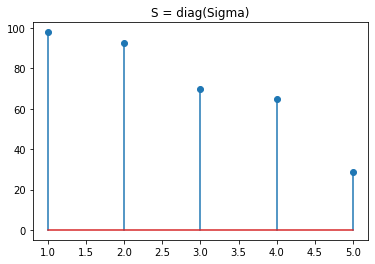

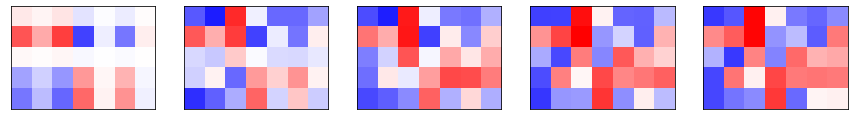

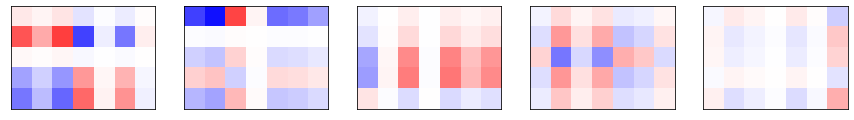

In [20]:
plt.figure()
plt.title('S = diag(Sigma)')
rr = range(1,len(S)+1)
plt.stem(rr, S)
plt.show()

E = []
plt.figure(figsize=(15,4))
maxRank = min(M,N)
for rnk in range(maxRank):
    Sr = np.zeros_like(S)
    Sr[0:rnk+1] = S[0:rnk+1]
    Sig = la.diagsvd(Sr, M, N)
    A2 = np.dot(np.dot(U, Sig), Vt)
    
    e = np.sum((A - A2)**2)
    E.append(e)
    
    plt.subplot(1,M,rnk+1)
    show_matrix(A2, cmap='bwr', Range=Range, cbar=False)
    
plt.show()


plt.figure(figsize=(15,4))
for rnk in range(maxRank):
    Sr = np.zeros_like(S)
    Sr[rnk] = S[rnk]
    Sig = la.diagsvd(Sr, M, N)
    A2 = np.dot(np.dot(U, Sig), Vt)
    plt.subplot(1,M,rnk+1)
    show_matrix(A2, cmap='bwr', Range=Range, cbar=False)
    
plt.show()

<ipython-input-21-c114dae2edc7>:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(rr, S**2)
<ipython-input-21-c114dae2edc7>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(rr,np.cumsum(S**2))
<ipython-input-21-c114dae2edc7>:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set

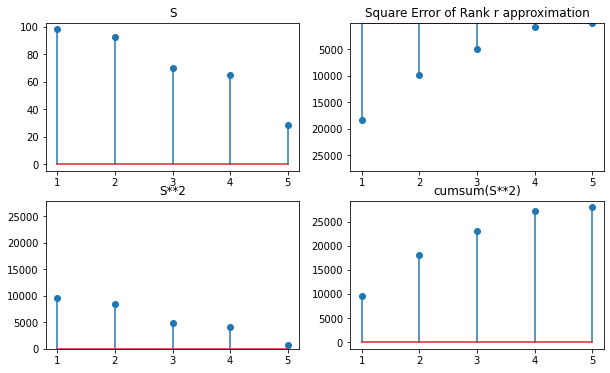

In [21]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,3)
ylim = np.sum(S**2)
plt.ylim([0, ylim])
plt.title('S**2')
rr = range(1,len(S)+1)
plt.stem(rr, S**2)

plt.subplot(2,2,4)
plt.title('cumsum(S**2)')
plt.stem(rr,np.cumsum(S**2))

plt.subplot(2,2,2)
plt.ylim(ylim)
plt.title('Square Error of Rank r approximation')
plt.stem(rr,E)

plt.subplot(2,2,1)
plt.title('S')
plt.stem(rr, S)

plt.show()